In [ ]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For Data Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Dimension Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Different Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


#Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Data**

In [ ]:
!git clone https://github.com/ihdavjar/Prml_Major_Project.git
org_data=pd.read_csv("/content/Prml_Major_Project/parkinsons.data")
org_data.head()

fatal: destination path 'Prml_Major_Project' already exists and is not an empty directory.


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Data Pre-Processing**

**1) Removing Name Column** as it did not seem to help in the process of classification

In [ ]:
org_data.drop(["name"],axis=1,inplace=True)
org_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**2) Removing Na/Nil Values**

In [ ]:
org_data.dropna(inplace=True)

**3) Replacing the last column of the data with labels**

In [ ]:
#This is code for finding the
l_cols=list(org_data.columns)
ind_labels=l_cols.index("status")
print("Columns for the Labels:",ind_labels)

Columns for the Labels: 16


**Data Standardisation**

In [ ]:
np_data=np.array(org_data)

x_data=np.c_[np_data[:,0:ind_labels],np_data[:,ind_labels+1:]]
y_data=np_data[:,ind_labels]

scaler = StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)

#New Columns
l_col_new=l_cols[0:ind_labels]+l_cols[ind_labels+1:]+["status"]

stan_data_np=np.c_[x_data,y_data.reshape((len(y_data),1))]

stan_data_pd=pd.DataFrame(stan_data_np,columns=l_col_new)

#New data with standardised features and labels in the last column
stan_data_pd.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1.0
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1.0
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1.0
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1.0
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1.0


**4) Outlier analysis**

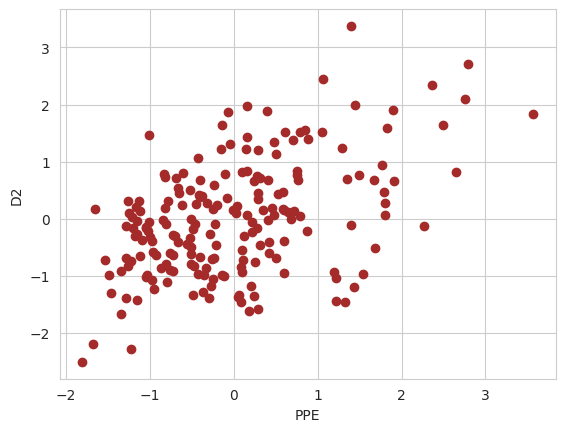

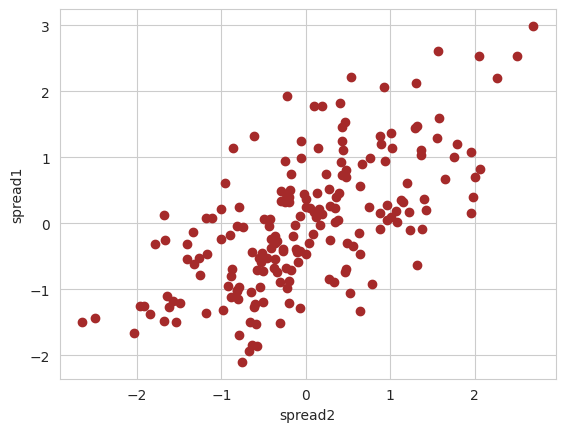

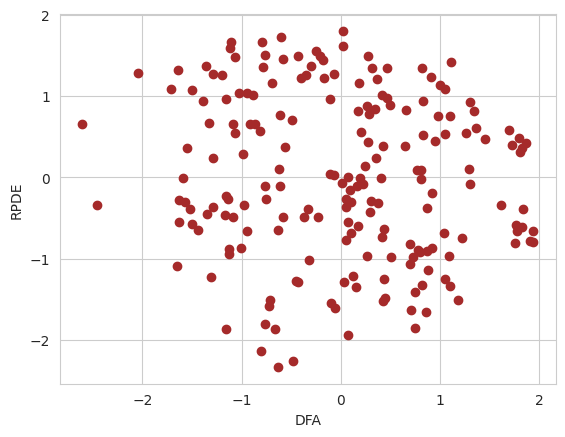

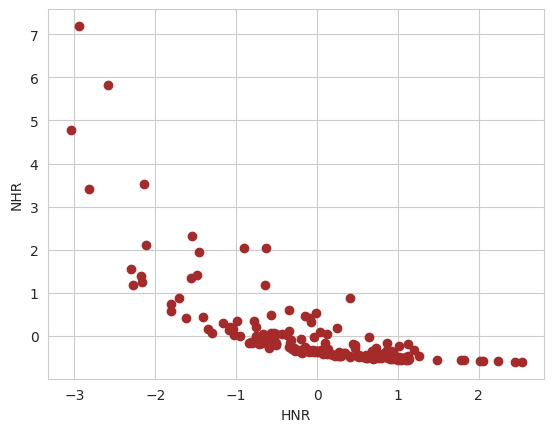

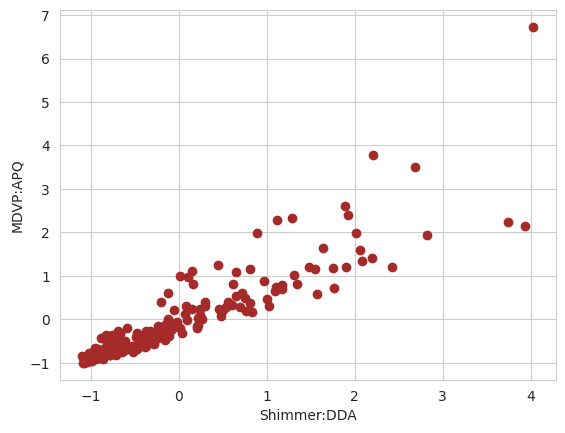

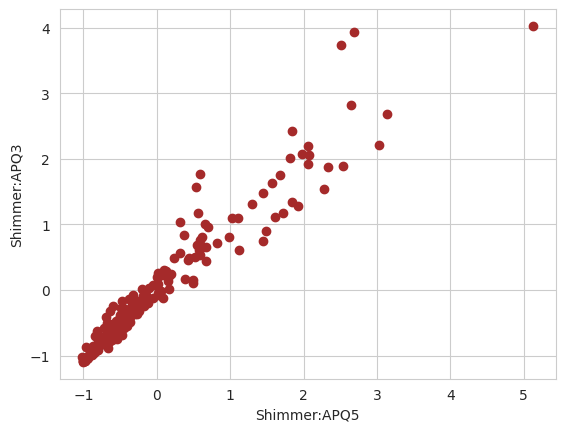

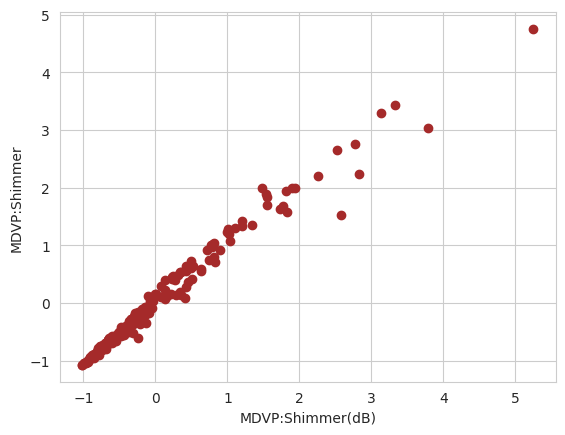

In [ ]:
#This function will basically give all the pairs of highly correlated features
def find_outliers(cov_data):
  l_cols=list(cov_data.columns)
  max_cov=-1
  in1=0
  in2=0
  for i in range(len(l_cols)):
    temp_l=list(cov_data[l_cols[i]])
    for j in range(len(l_cols)):
      if (max_cov<abs(temp_l[j]) and i!=j):
        in1=i
        in2=j

  return [l_cols[in1],l_cols[in2]]

#This is the x_data in pandas format
x_data_pd=pd.DataFrame(x_data,columns=l_col_new[0:len(l_col_new)-1])

temp_outliers=find_outliers(x_data_pd.cov())

temp_data=x_data_pd.copy(deep=True)

for i in range(7):
  temp_outliers=find_outliers(temp_data.cov())
  plt.scatter(x_data_pd[temp_outliers[0]],x_data_pd[temp_outliers[1]],color="brown")
  plt.xlabel(temp_outliers[0])
  plt.ylabel(temp_outliers[1])
  temp_data=temp_data.drop([temp_outliers[0],temp_outliers[1]],axis=1)
  print("\n")
  plt.show()


**There is only one outlier in the data**

**Removing the outlier**

In [ ]:
stan_data_filtered=stan_data_pd[stan_data_pd['MDVP:Shimmer(dB)']<4]
x_data_pd=x_data_pd[stan_data_pd['MDVP:Shimmer(dB)']<4]

stan_data_filtered=stan_data_pd[stan_data_pd['NHR']<=5]
x_data_pd=x_data_pd[stan_data_pd['NHR']<=5]

stan_data_filtered

<ipython-input-50-0e30fb403f81>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_data_pd=x_data_pd[stan_data_pd['NHR']<=5]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1.0
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1.0
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1.0
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1.0
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703,0.0
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929,0.0
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410,0.0
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105,0.0


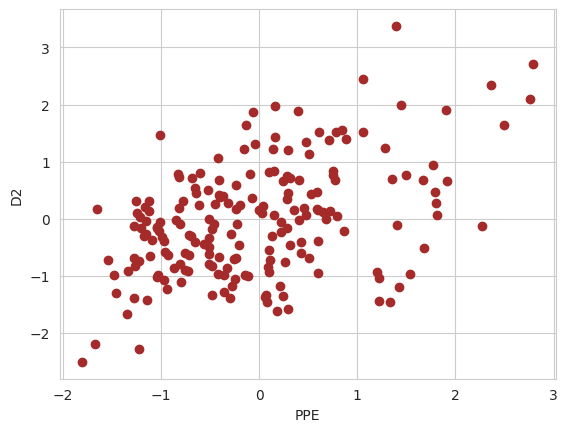

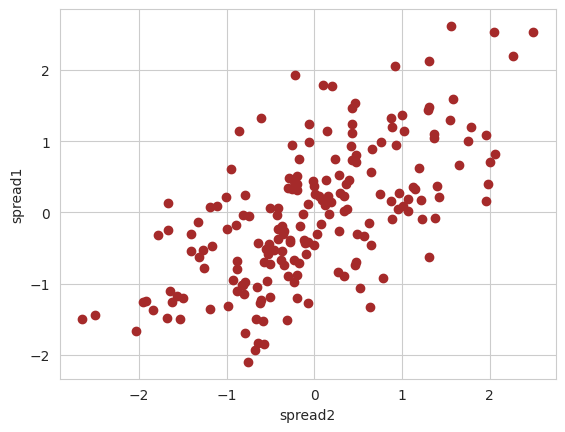

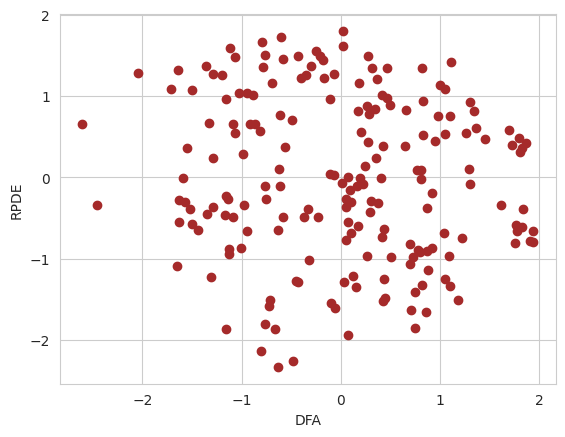

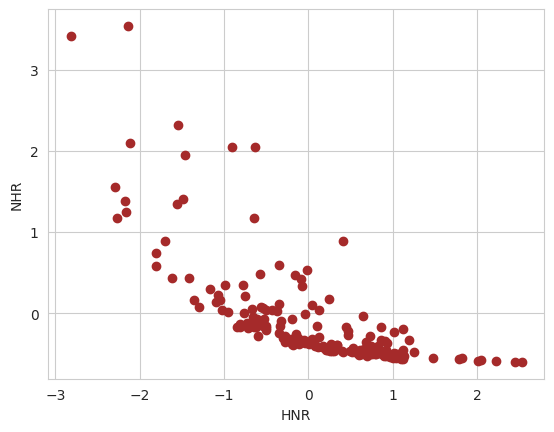

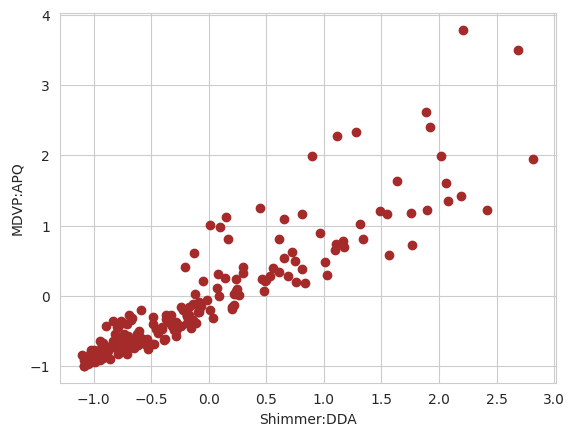

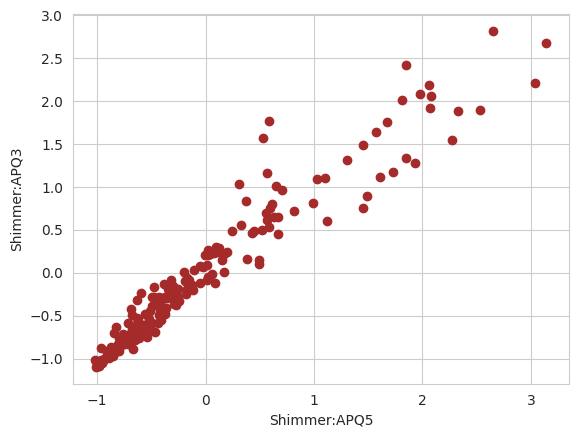

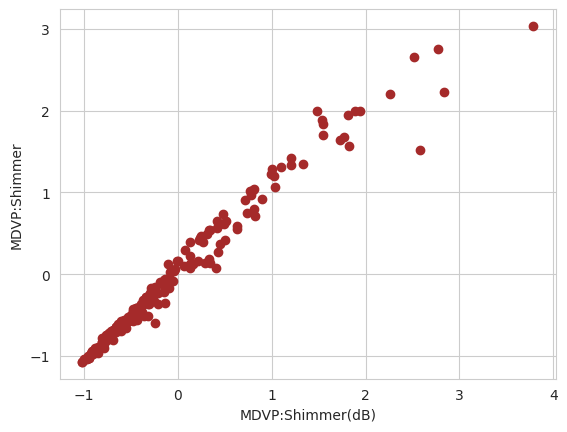

In [ ]:
#This function will basically give all the pairs of highly correlated features
def find_outliers(cov_data):
  l_cols=list(cov_data.columns)
  max_cov=-1
  in1=0
  in2=0
  for i in range(len(l_cols)):
    temp_l=list(cov_data[l_cols[i]])
    for j in range(len(l_cols)):
      if (max_cov<abs(temp_l[j]) and i!=j):
        in1=i
        in2=j

  return [l_cols[in1],l_cols[in2]]

#This is the x_data in pandas format
# x_data_pd=pd.DataFrame(x_data,columns=l_col_new[0:len(l_col_new)-1])

temp_outliers=find_outliers(x_data_pd.cov())

temp_data=x_data_pd.copy(deep=True)

for i in range(7):
  temp_outliers=find_outliers(temp_data.cov())
  plt.scatter(x_data_pd[temp_outliers[0]],x_data_pd[temp_outliers[1]],color="brown")
  plt.xlabel(temp_outliers[0])
  plt.ylabel(temp_outliers[1])
  temp_data=temp_data.drop([temp_outliers[0],temp_outliers[1]],axis=1)
  print("\n")
  plt.show()


**5) Dimensionality Reduction**

In [ ]:
#this is the numpy array of data which is standardised ad free of outliers
np_data_filtered=np.array(stan_data_filtered)

x_data=np_data_filtered[:,0:len(np_data_filtered[0])-1]
y_data=np_data_filtered[:,len(np_data_filtered[0])-1].astype('int')
print(y_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0]


In [ ]:
print("Number of features without any dimensionality reduction:",len(x_data[0]))

Number of features without any dimensionality reduction: 22


**Applying PCA to Data**

In [ ]:
pca=PCA()
x_data_pca = pca.fit_transform(x_data)

**Deciding the number of PC axis to be considered**

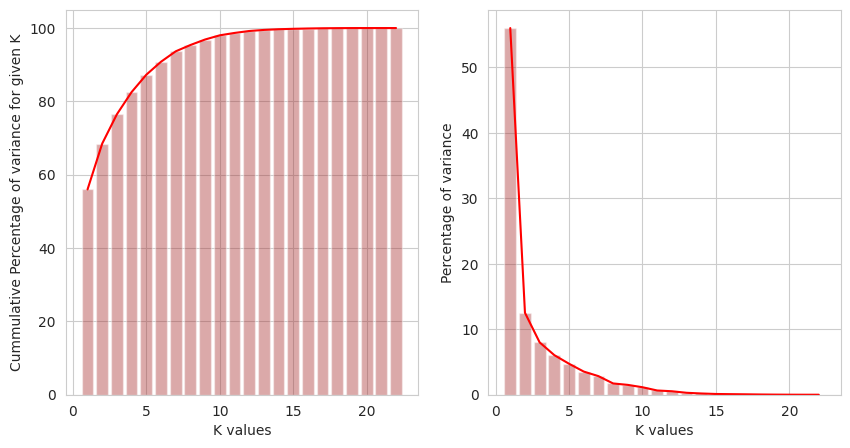

In [ ]:
temp_vars=pca.explained_variance_
total_var=sum(temp_vars)
cur_var=0
per_values=[]
per_values1=[]
k_values=[]
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))

for i in range(len(temp_vars)):
  cur_var=cur_var+temp_vars[i]
  per_values1.append(100*(temp_vars[i]/total_var))
  per_values.append(100*cur_var/total_var)
  k_values.append(i+1)

plt.subplot(1,2,1)
plt.plot(k_values,per_values,c="red")
plt.bar(k_values,per_values,alpha=0.4,color="brown")
plt.xlabel("K values")
plt.ylabel("Cummulative Percentage of variance for given K")

plt.subplot(1,2,2)
plt.plot(k_values,per_values1,c="red")
plt.bar(k_values,per_values1,alpha=0.4,color="brown")
plt.xlabel("K values")
plt.ylabel("Percentage of variance")
plt.show()

**So choosing 15 PC axis**

In [ ]:
print("Percentage of variance conserved = ",per_values[14])

Percentage of variance conserved =  99.79122282041318


In [ ]:
x_data_pca=x_data_pca[:,0:15]
print("Number of features in the Data after PCA:-",len(x_data_pca[0]))

Number of features in the Data after PCA:- 15


**Applying LDA on the Data**

Number of Features after Applying LDA:- 1


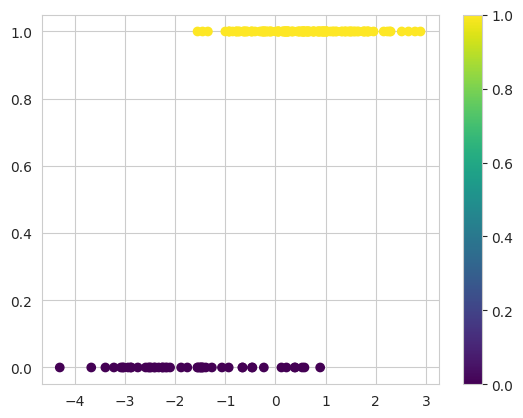

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_data, y_data)
x_data_lda=clf.transform(x_data)

print("Number of Features after Applying LDA:-",len(x_data_lda[0]))

plt.scatter(x_data_lda,y_data,c=y_data,cmap="viridis")
plt.colorbar()
plt.show()

**6) Splitting the data into train, val and test set**

In [ ]:
#Standardised data without outliers
x_data=np_data_filtered[:,0:len(np_data_filtered[0])-1]
y_data=np_data_filtered[:,len(np_data_filtered[0])-1].astype('int')

x_train, x_test1, y_train, y_test1 = train_test_split(x_data, y_data,shuffle=True,test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1,shuffle=True,test_size=0.5, random_state=42)

#Pca data
x_data_pca
x_train_pca, x_test1_pca, y_train_pca, y_test1_pca = train_test_split(x_data_pca, y_data,shuffle=True,test_size=0.4, random_state=42)
x_val_pca, x_test_pca, y_val_pca, y_test_pca = train_test_split(x_test1_pca, y_test1_pca,shuffle=True,test_size=0.5, random_state=42)


#Lda Data
x_data_lda
x_train_lda, x_test1_lda, y_train_lda, y_test1_lda = train_test_split(x_data_lda, y_data,shuffle=True,test_size=0.4, random_state=42)
x_val_lda, x_test_lda, y_val_lda, y_test_lda = train_test_split(x_test1_lda, y_test1_lda,shuffle=True,test_size=0.5, random_state=42)



**Exploratory Data Analysis (EDA)**

**1) Pie Chart for labels**

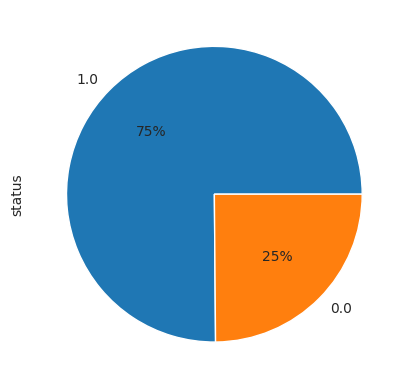

In [ ]:
stan_data_filtered['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")
plt.show()

**2) Data Visualisation**

**For the Standardised Data**

{}


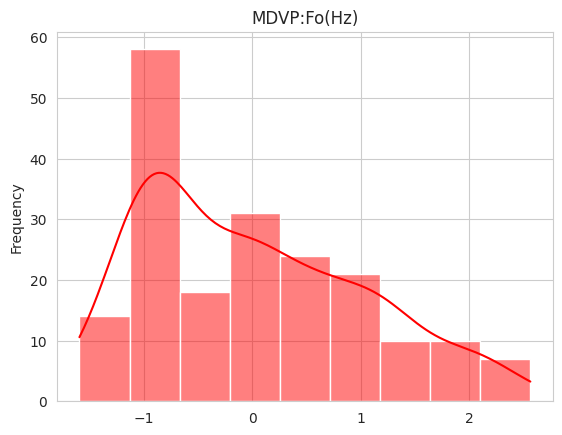

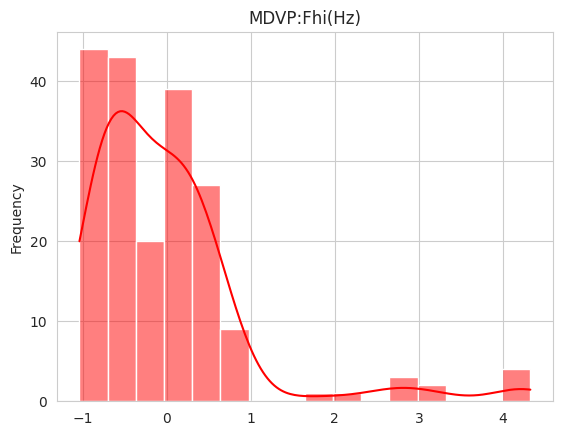

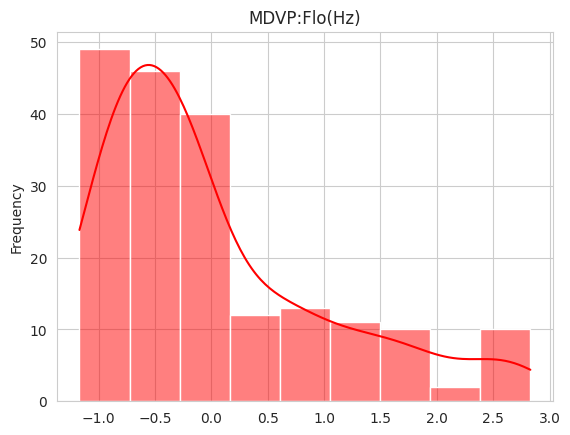

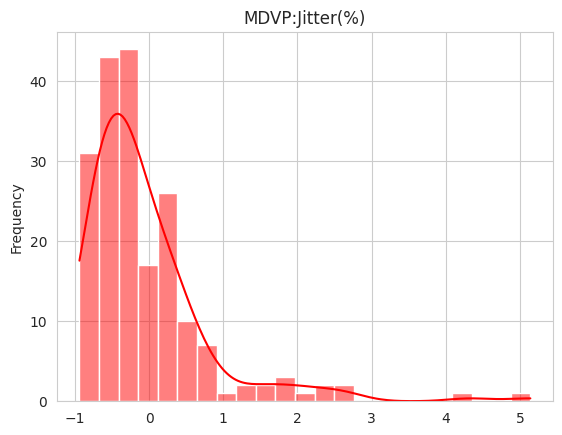

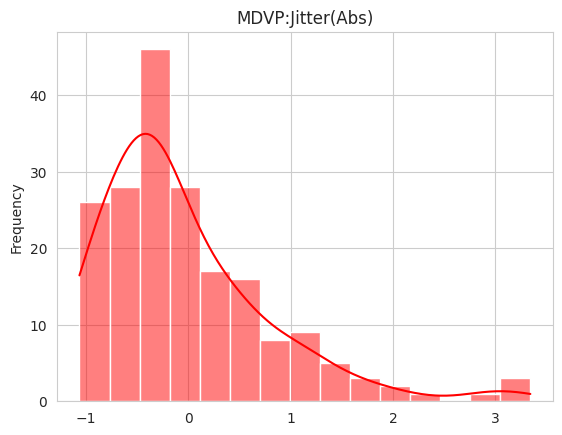

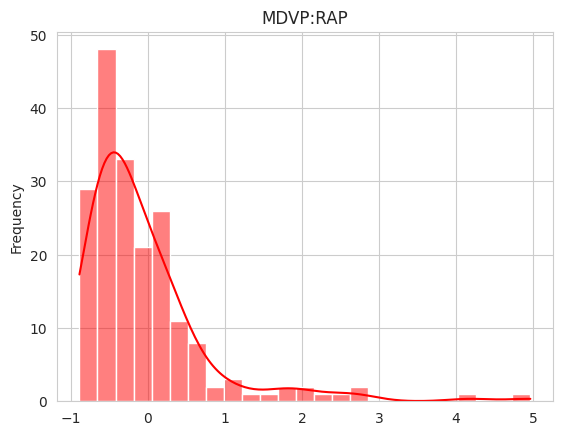

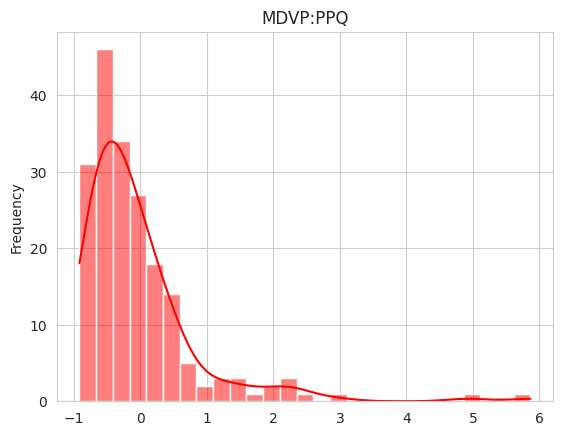

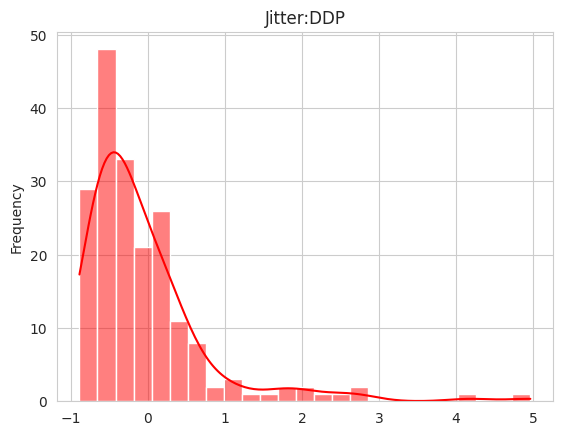

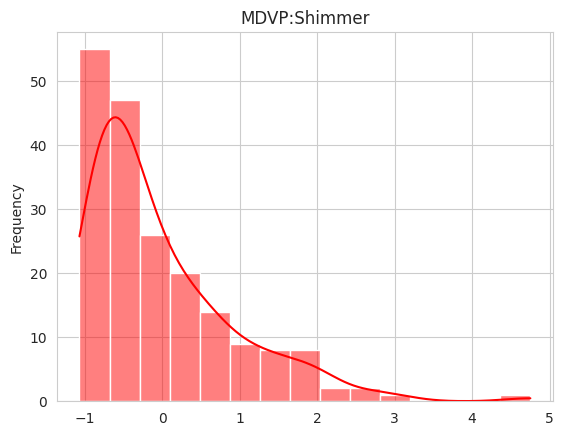

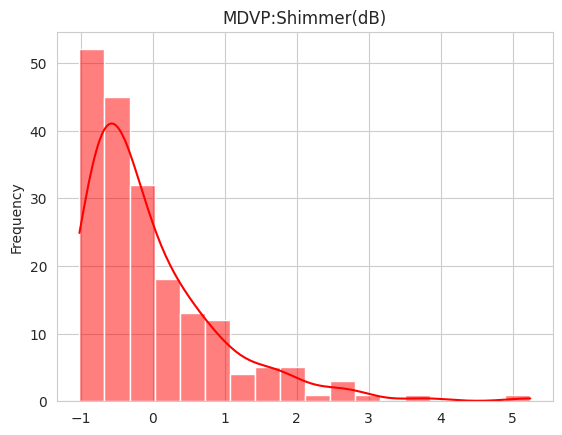

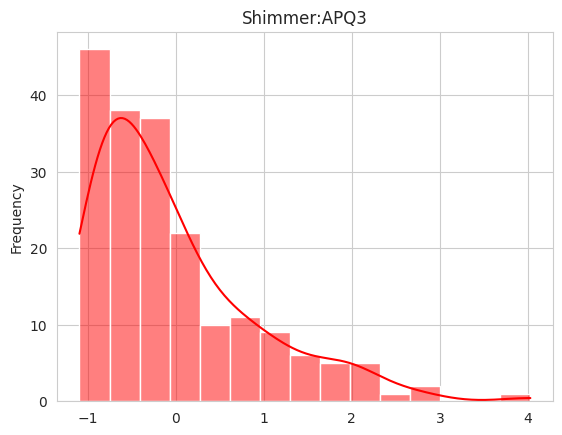

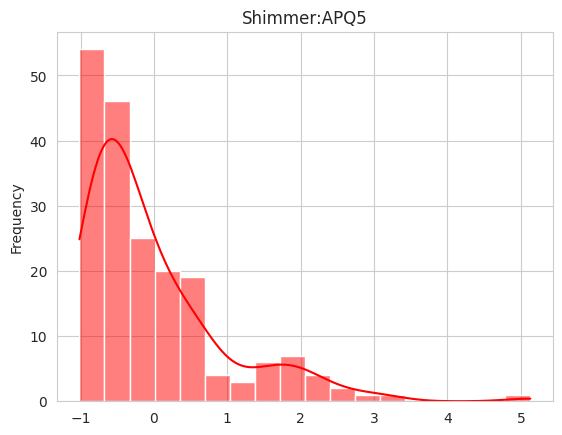

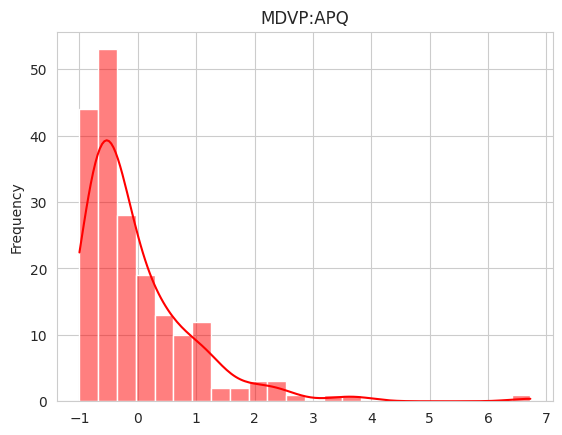

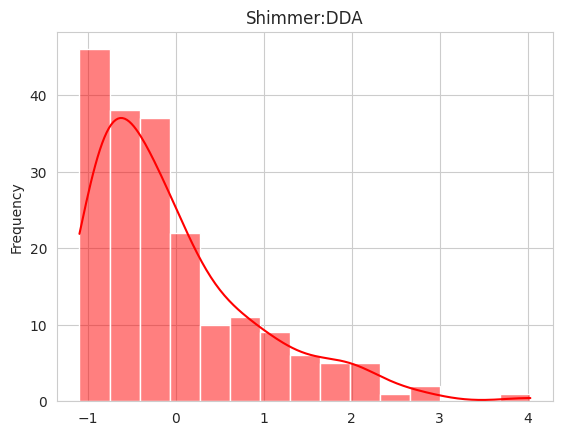

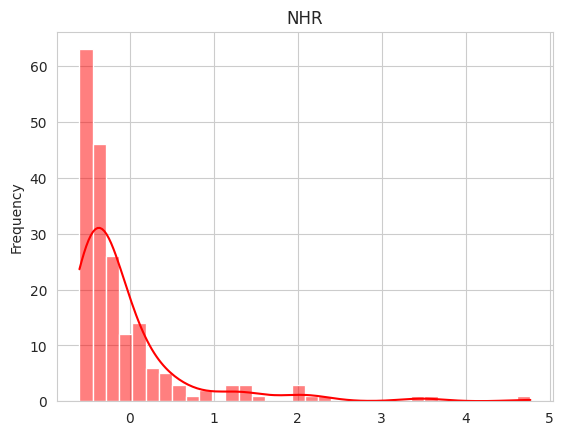

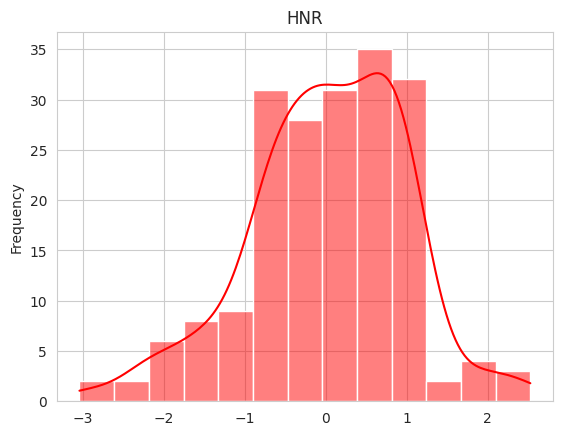

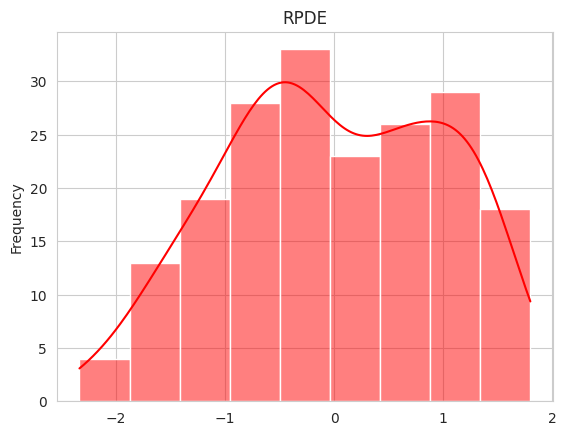

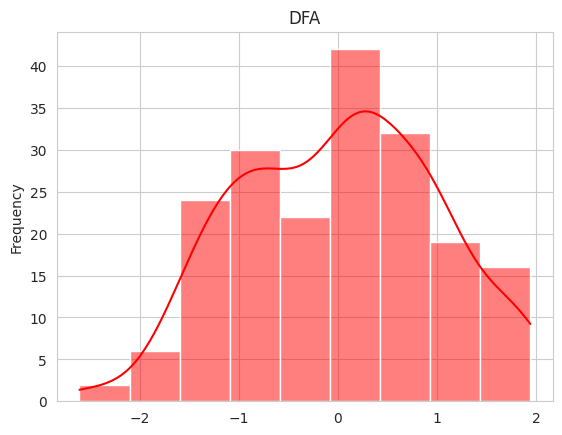

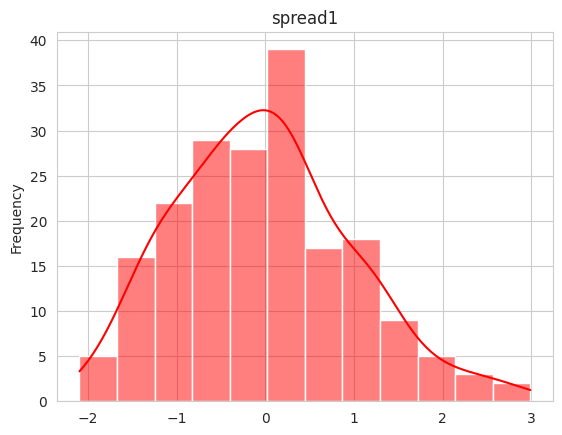

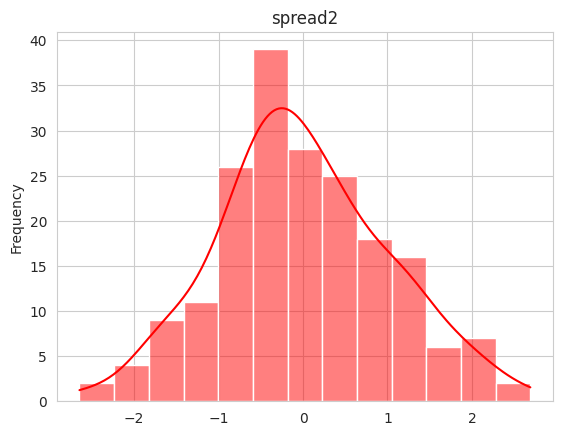

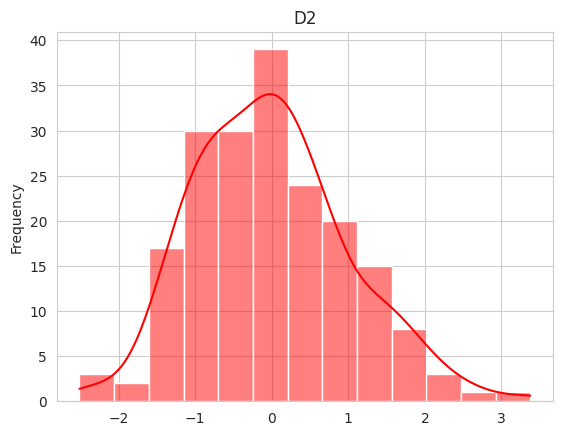

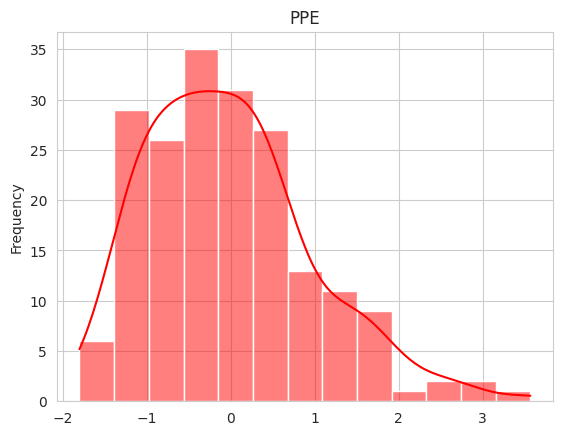

In [ ]:
def cat_of_list(l):
  l1=[]
  for i in l:
    if i not in l1:
      l1.append(i)
  return l1

def categories_output(d):
  l_col=list(d.columns)
  l1=[]
  d1={}
  for i in l_col:
    l=list(d[i])
    if (type(l[0])==str):
      l1.append(i)
      d1[i]=cat_of_list(l)
  print(d1)
  return d1;

def visualisation_bar_hist(data):
  l_col=list(data.columns)
  temp_cat=categories_output(data)
  temp_keys=list(temp_cat.keys())
  temp_values=list(temp_cat.values())

  for i in range(len(l_col)-1):
    if l_col[i] in temp_keys:
      label=l_col[i]
      temp_val=temp_cat[label]
      temp_list=[]
      temp_columns=list(data[label])
      for j in range(len(temp_val)):
        temp_list.append(temp_columns.count(temp_val[j]))

      plt.bar(temp_val,temp_list,color='red')
      plt.title(l_col[i]+"-Bar Graph")
      plt.ylabel("Frequency")
      plt.show()
      print()
    else:
      temp_columns=list(data[l_col[i]])
      sns.histplot(temp_columns,color="red",kde=True)
      plt.title(l_col[i])
      plt.ylabel("Frequency")
      plt.show()
      print()

visualisation_bar_hist(stan_data_filtered)


**Pca Data**

{}


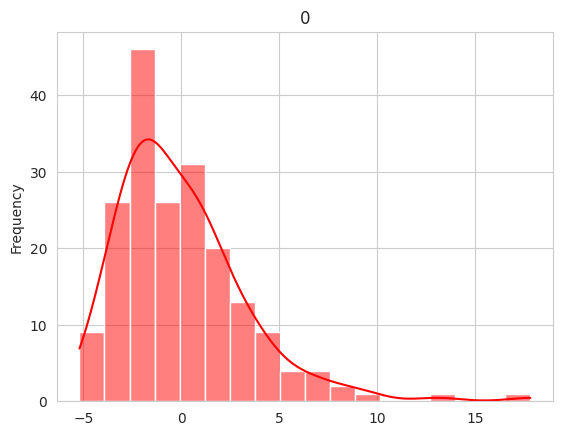

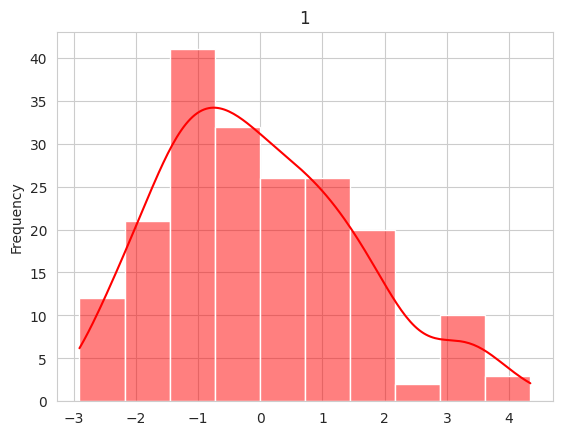

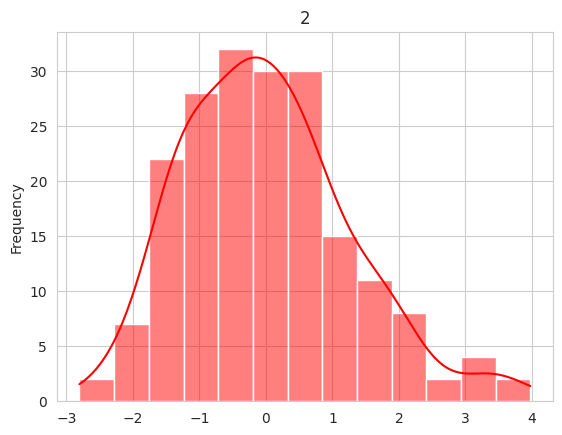

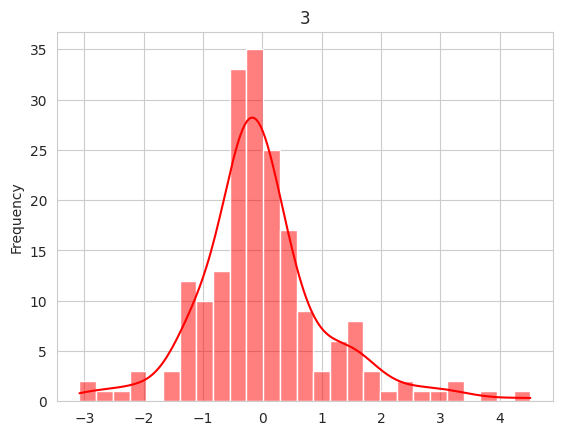

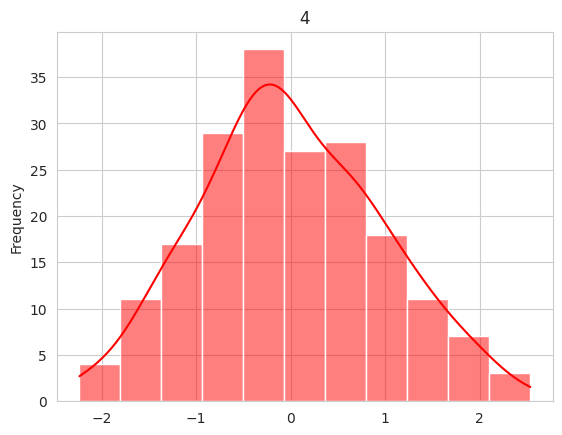

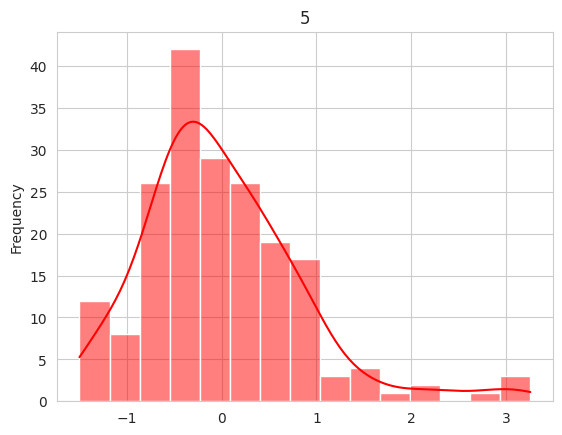

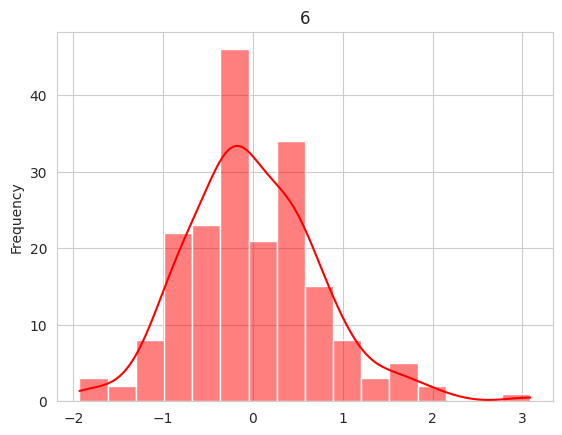

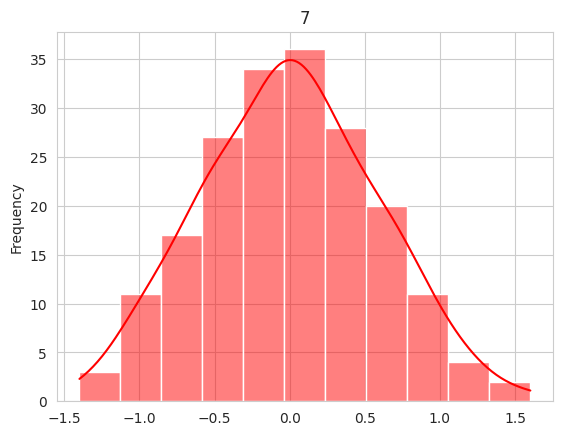

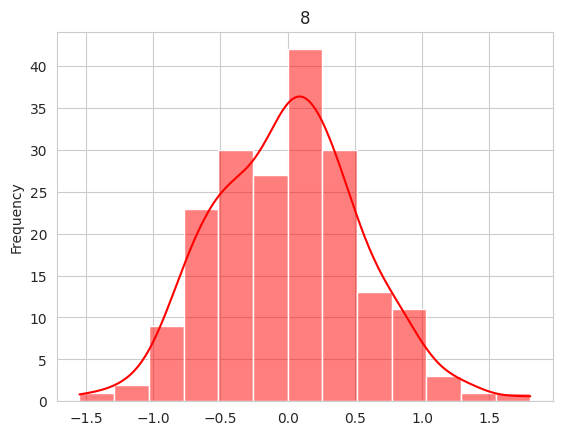

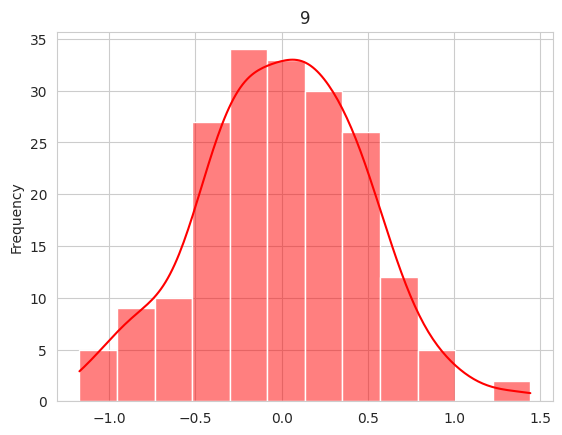

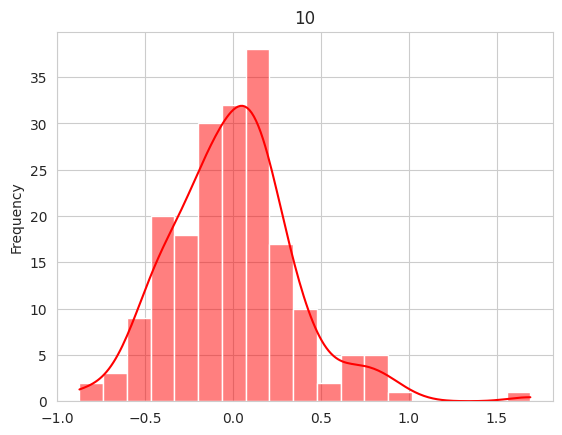

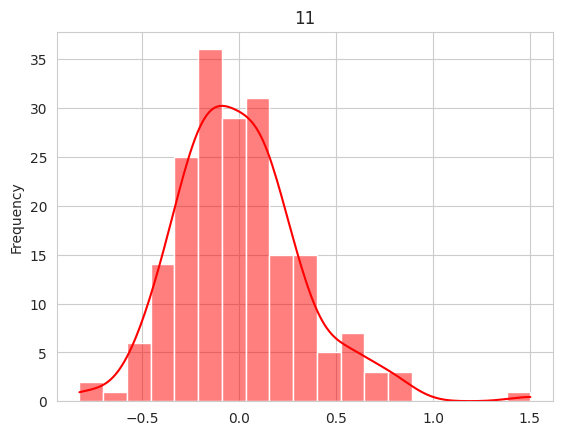

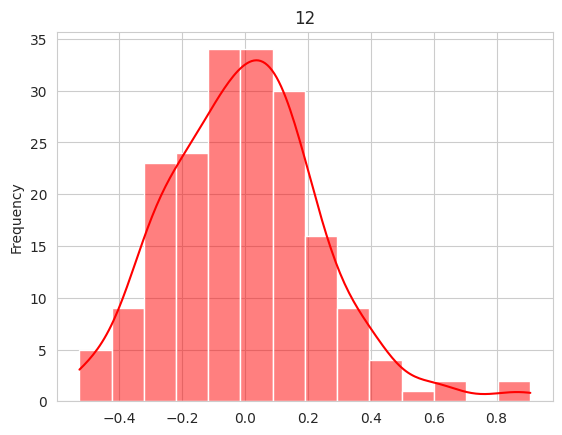

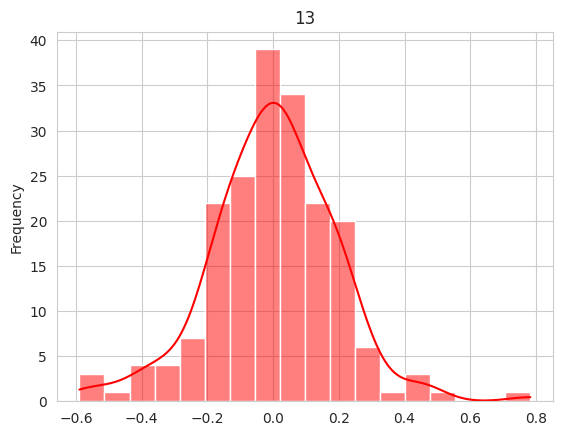

In [ ]:
visualisation_bar_hist(pd.DataFrame(x_data_pca))

**Lda Data**

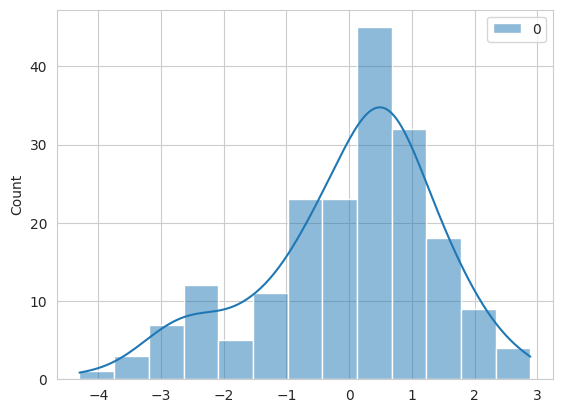

In [ ]:
sns.histplot(x_data_lda,kde=True)
plt.show()

**3) Heatmaps**

**Standardised Data**

<Axes: >

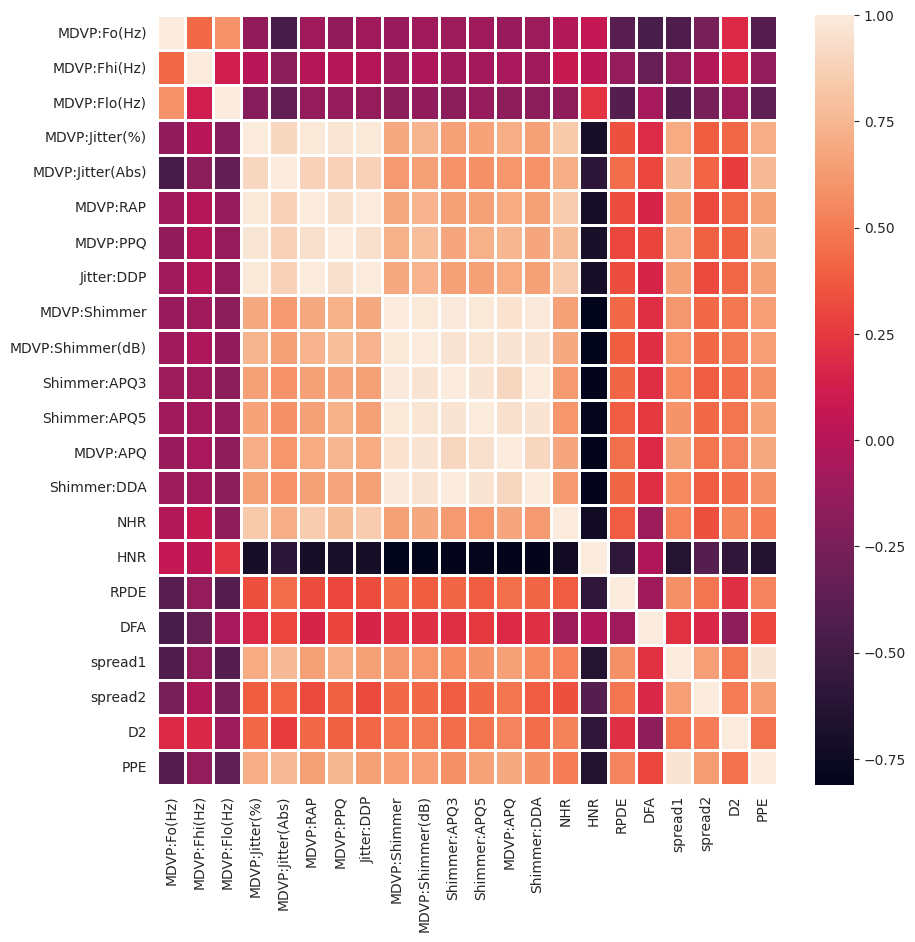

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(x_data_pd).corr(),cmap="rocket",linecolor="white",linewidth=0.8)

**Pca Data**

<Axes: >

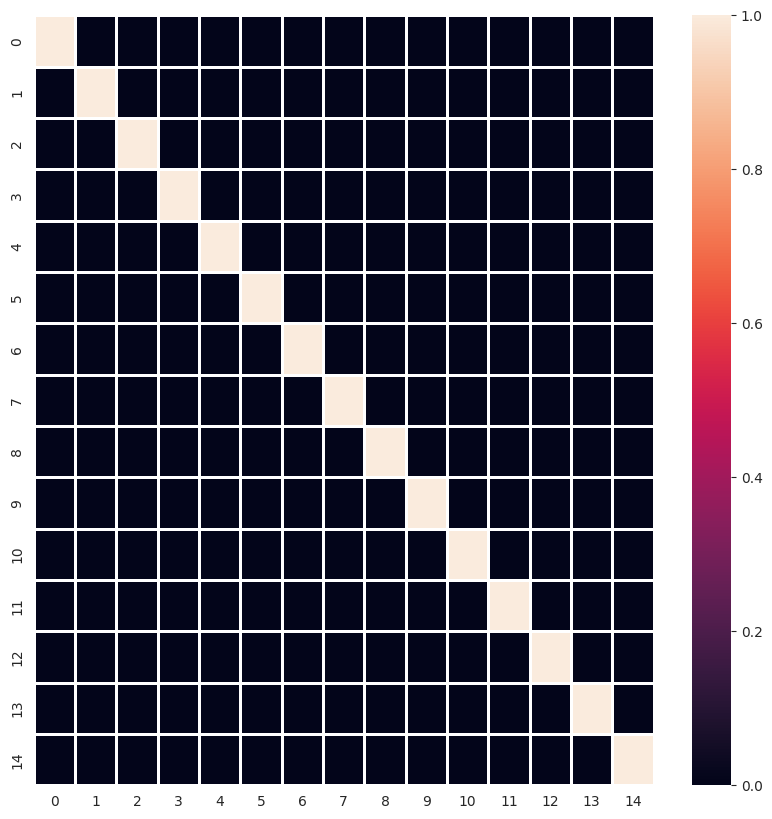

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(x_data_pca).corr(),cmap="rocket",linecolor="white",linewidth=0.8)

**Gaussian Naive Bayes**

In [ ]:
model=GaussianNB()

**Using SFS with base classifier as Gaussian NB to find better features**

Total Number of the Features in Original Data:- 22
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2']
CV Score for s:
0.7148448043184885


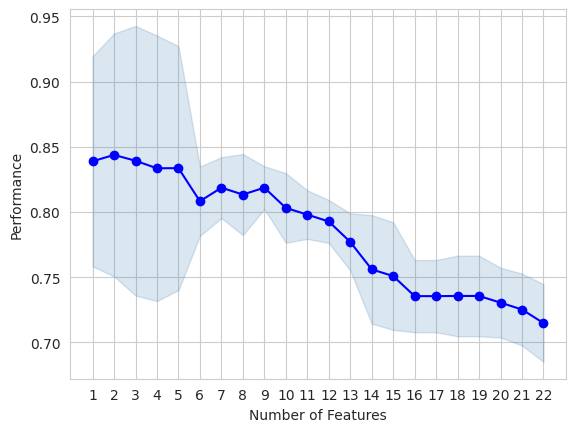

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0.8388663967611336, 0.8437246963562753, 0.8392712550607287, 0.8334682860998651, 0.8336032388663966, 0.8082321187584345, 0.8186234817813764, 0.8133603238866396, 0.8186234817813764, 0.8031039136302294, 0.7979757085020243, 0.7927125506072874, 0.7770580296896086, 0.7560053981106613, 0.7508771929824561, 0.7354925775978407, 0.7354925775978407, 0.7356275303643726, 0.7356275303643726, 0.7304993252361675, 0.7252361673414305, 0.7148448043184885]
2


In [ ]:
print("Total Number of the Features in Original Data:-",len(x_data[0]))
sfs=SFS(model,k_features=22,forward=True,floating=True,cv=5)
sfs.fit(x_data,y_data)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

temp_dict=sfs.subsets_

temp_dict_keys=list(temp_dict.keys())
print(temp_dict_keys)


errors=[]
for i in range(len(temp_dict_keys)):
  temp_d=temp_dict[i+1]
  errors.append(temp_d['avg_score'])

print(errors)

ind=temp_dict_keys[np.argmax(errors)]

print(ind)

sfs1=SFS(model,k_features=ind,forward=True,floating=False,cv=5)
sfs1.fit(x_data,y_data)

x_data_sfs=sfs.transform(x_data)

**Splitting the resulting SFS Data**

In [ ]:
x_train_sfs, x_test1_sfs, y_train_sfs, y_test1_sfs = train_test_split(x_data_sfs, y_data,shuffle=True,test_size=0.4, random_state=42)

**Evaluation**

Accuracy Score on Standardised Data 0.717948717948718
Accuracy Score on PCA Data 0.7948717948717948
Accuracy Score on LDA Data 0.8974358974358975
Accuracy Score on SFS Data 0.717948717948718


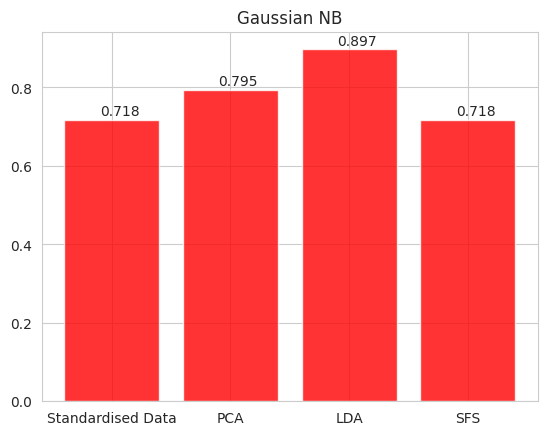

In [ ]:
model=GaussianNB()

model.fit(x_train,y_train)
acc1=model.score(x_test1,y_test1)
y_pred1=model.predict(x_test1)
print("Accuracy Score on Standardised Data",acc1)

model.fit(x_train_pca,y_train_pca)
acc2=model.score(x_test1_pca,y_test1_pca)
y_pred2=model.predict(x_test1_pca)
print("Accuracy Score on PCA Data",acc2)

model.fit(x_train_lda,y_train_lda)
acc3=model.score(x_test1_lda,y_test1_lda)
y_pred3=model.predict(x_test1_lda)
print("Accuracy Score on LDA Data",acc3)

model.fit(x_train_sfs,y_train_sfs)
acc4=model.score(x_test1_sfs,y_test1_sfs)
y_pred4=model.predict(x_test1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("Gaussian NB")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**For Finding F1 Score**

Accuracy Score on Standardised Data 0.7708333333333334
Accuracy Score on PCA Data 0.7948717948717948
Accuracy Score on LDA Data 0.8974358974358975
Accuracy Score on SFS Data 0.717948717948718


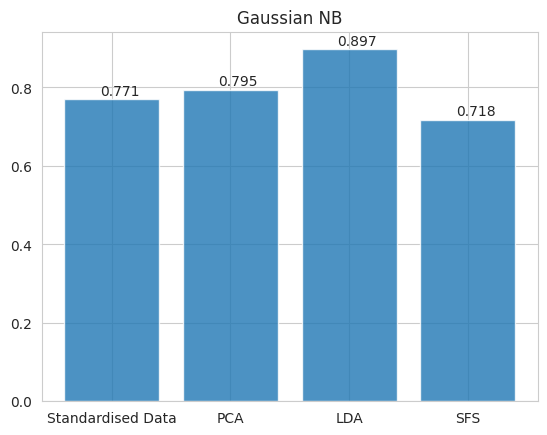

In [ ]:
model=GaussianNB()

model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)


model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)


model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)


model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("Gaussian NB")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**Decision Tree Classifier**

In [ ]:
model=DecisionTreeClassifier()

**Using SFS with base classifier as Decision Tree to find better features**

Total Number of the Features in Original Data:- 22
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2']
CV Score for s:
0.755195681511471


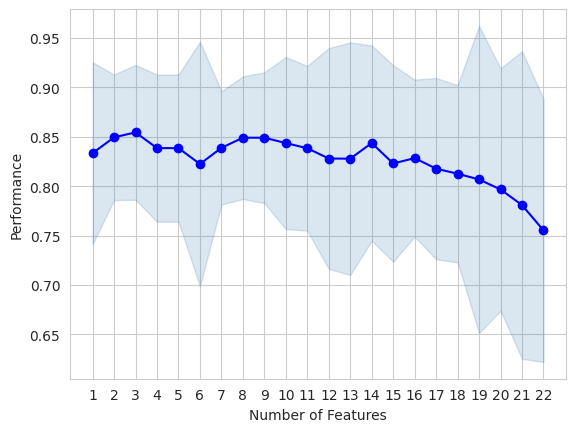

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0.8333333333333333, 0.8493927125506072, 0.8543859649122807, 0.8384615384615385, 0.8384615384615385, 0.8224021592442645, 0.8387314439946019, 0.8489878542510123, 0.8489878542510123, 0.8435897435897436, 0.8383265856950068, 0.8279352226720649, 0.8278002699055331, 0.8435897435897436, 0.8229419703103913, 0.8283400809716598, 0.8176788124156544, 0.8125506072874493, 0.8067476383265857, 0.7966261808367072, 0.7808367071524966, 0.755195681511471]
3


In [ ]:
print("Total Number of the Features in Original Data:-",len(x_data[0]))
sfs=SFS(model,k_features=22,forward=True,floating=True,cv=5)
sfs.fit(x_data,y_data)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

temp_dict=sfs.subsets_

temp_dict_keys=list(temp_dict.keys())
print(temp_dict_keys)


errors=[]
for i in range(len(temp_dict_keys)):
  temp_d=temp_dict[i+1]
  errors.append(temp_d['avg_score'])

print(errors)

ind=temp_dict_keys[np.argmax(errors)]

print(ind)

sfs1=SFS(model,k_features=ind,forward=True,floating=False,cv=5)
sfs1.fit(x_data,y_data)

x_data_sfs=sfs.transform(x_data)

**Splitting the resulting SFS Data**

In [ ]:
x_train_sfs, x_test1_sfs, y_train_sfs, y_test1_sfs = train_test_split(x_data_sfs, y_data,shuffle=True,test_size=0.4, random_state=42)
x_val_sfs, x_test_sfs, y_val_sfs, y_test_sfs = train_test_split(x_test1_sfs, y_test1_sfs,shuffle=True,test_size=0.5, random_state=42)


**Evaluation**

Accuracy Score on Standardised Data 0.8076923076923077
Accuracy Score on PCA Data 0.8589743589743589
Accuracy Score on LDA Data 0.8589743589743589
Accuracy Score on SFS Data 0.8076923076923077


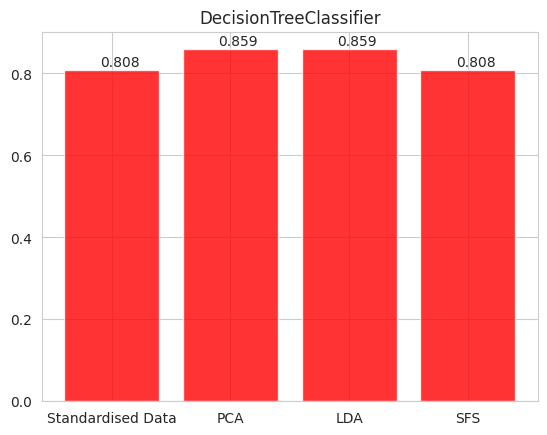

In [ ]:
model=DecisionTreeClassifier()

model.fit(x_train,y_train)
acc1=model.score(x_test1,y_test1)
y_pred1=model.predict(x_test1)
print("Accuracy Score on Standardised Data",acc1)

model.fit(x_train_pca,y_train_pca)
acc2=model.score(x_test1_pca,y_test1_pca)
y_pred2=model.predict(x_test1_pca)
print("Accuracy Score on PCA Data",acc2)

model.fit(x_train_lda,y_train_lda)
acc3=model.score(x_test1_lda,y_test1_lda)
y_pred3=model.predict(x_test1_lda)
print("Accuracy Score on LDA Data",acc3)

model.fit(x_train_sfs,y_train_sfs)
acc4=model.score(x_test1_sfs,y_test1_sfs)
y_pred4=model.predict(x_test1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("DecisionTreeClassifier")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 scores**

Accuracy Score on Standardised Data 0.8695652173913043
Accuracy Score on PCA Data 0.8589743589743589
Accuracy Score on LDA Data 0.8589743589743589
Accuracy Score on SFS Data 0.8076923076923077


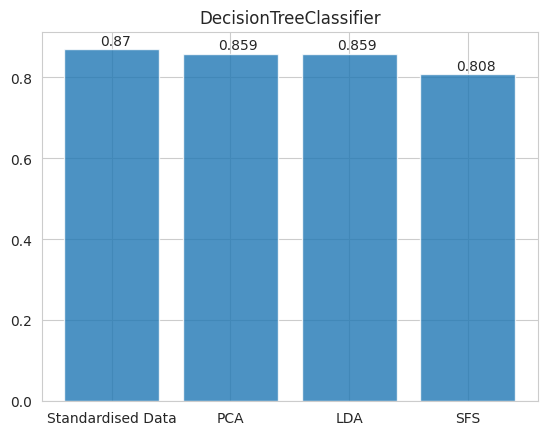

In [ ]:
model=DecisionTreeClassifier()

model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)


model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)


model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)


model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)

print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("DecisionTreeClassifier")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**Trying to optimise the hyperparameters on the validation data**

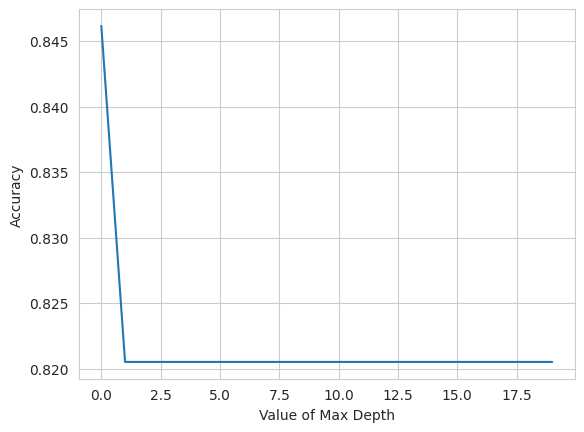

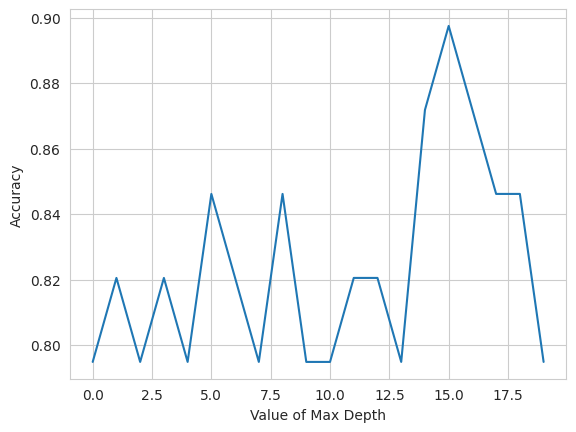

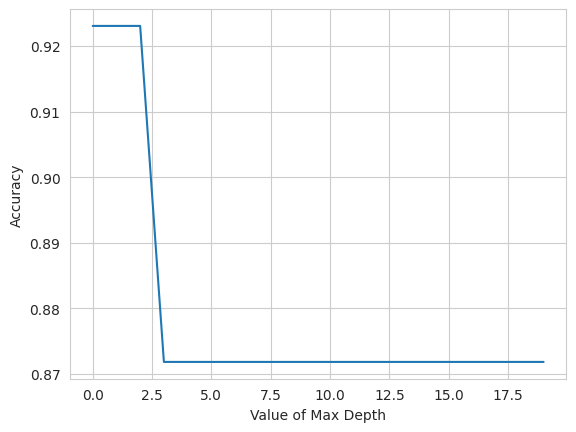

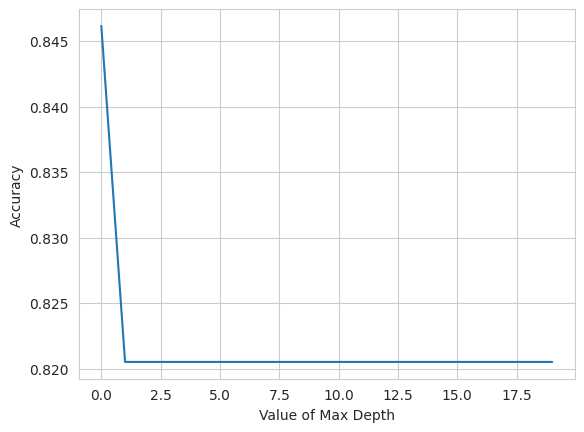

In [ ]:
acc1=[]
#On standardised data
for i in range(20):
  model=DecisionTreeClassifier(max_depth=i+1)
  model.fit(x_train,y_train)

  acc1.append(model.score(x_val,y_val))

best_max_depth_1=np.argmax(acc1)
best_acc1=max(acc1)
plt.plot(acc1)
plt.xlabel("Value of Max Depth")
plt.ylabel("Accuracy")
plt.show()

acc2=[]
#On PCA data
for i in range(20):
  model=DecisionTreeClassifier(max_depth=i+1)
  model.fit(x_train_pca,y_train_pca)

  acc2.append(model.score(x_val_pca,y_val_pca))

best_max_depth_2=np.argmax(acc2)
best_acc2=max(acc2)
plt.plot(acc2)
plt.xlabel("Value of Max Depth")
plt.ylabel("Accuracy")
plt.show()

acc3=[]
#On LDA data
for i in range(20):
  model=DecisionTreeClassifier(max_depth=i+1)
  model.fit(x_train_lda,y_train_lda)

  acc3.append(model.score(x_val_lda,y_val_lda))

best_max_depth_3=np.argmax(acc3)
best_acc3=max(acc3)
plt.plot(acc3)
plt.xlabel("Value of Max Depth")
plt.ylabel("Accuracy")
plt.show()


acc4=[]
#On SFS data
for i in range(20):
  model=DecisionTreeClassifier(max_depth=i+1)
  model.fit(x_train_sfs,y_train_sfs)

  acc4.append(model.score(x_val_sfs,y_val_sfs))

best_max_depth_4=np.argmax(acc4)
best_acc4=max(acc4)
plt.plot(acc4)
plt.xlabel("Value of Max Depth")
plt.ylabel("Accuracy")
plt.show()

**Final Accuracy**

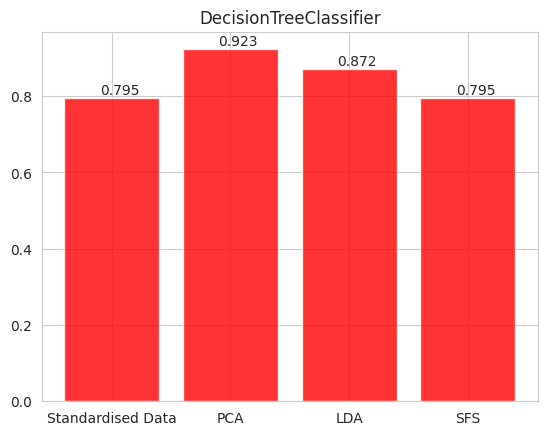

In [ ]:
model1=DecisionTreeClassifier(max_depth=best_max_depth_1+1)
model1.fit(x_train,y_train)
acc1=model1.score(x_test,y_test)

model2=DecisionTreeClassifier(max_depth=best_max_depth_2+1)
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test_pca,y_test_pca)

model3=DecisionTreeClassifier(max_depth=best_max_depth_3+1)
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test_lda,y_test_lda)

model4=DecisionTreeClassifier(max_depth=best_max_depth_4+1)
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test_sfs,y_test_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("DecisionTreeClassifier")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 scores**

Accuracy Score on Standardised Data 0.875
Accuracy Score on PCA Data 0.9230769230769231
Accuracy Score on LDA Data 0.8717948717948718
Accuracy Score on SFS Data 0.7948717948717948


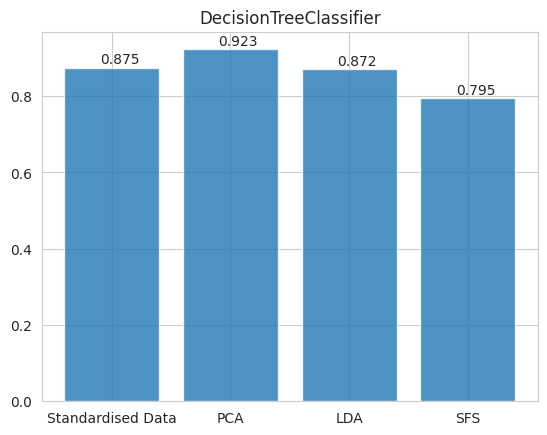

Text(0.5, 23.52222222222222, 'Actual')

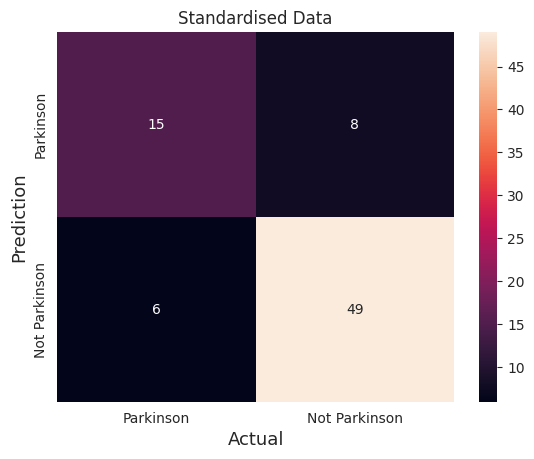

In [ ]:

model=DecisionTreeClassifier(max_depth=best_max_depth_1+1)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=DecisionTreeClassifier(max_depth=best_max_depth_2+1)
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=DecisionTreeClassifier(max_depth=best_max_depth_3+1)
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=DecisionTreeClassifier(max_depth=best_max_depth_4+1)
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("DecisionTreeClassifier")


for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()


dat=confusion_matrix(y_pred1,y_test1)
sns.heatmap(dat,annot=True,xticklabels=['Parkinson','Not Parkinson'],
            yticklabels=['Parkinson','Not Parkinson'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)

**Bagging with these Classifiers using Random Forest Regressor**

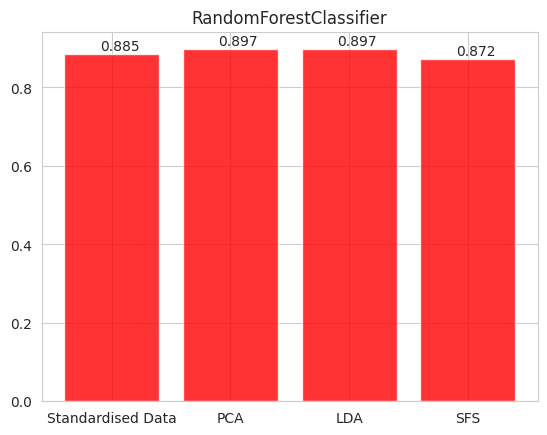

Text(0.5, 23.52222222222222, 'Actual')

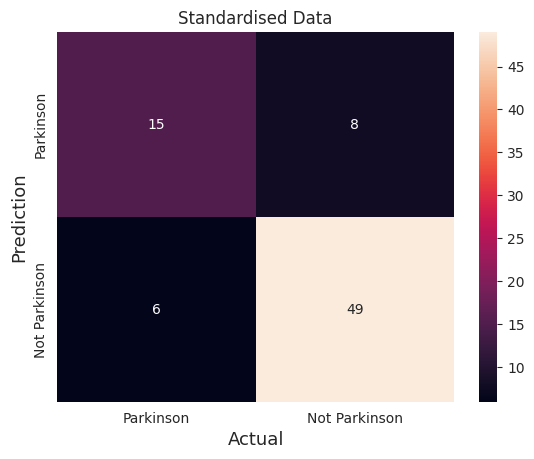

In [ ]:
model1=RandomForestClassifier(max_depth=best_max_depth_1+1)
model1.fit(x_train,y_train)
acc1=model1.score(x_test1,y_test1)

model2=RandomForestClassifier(max_depth=best_max_depth_2+1)
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test1_pca,y_test1_pca)

model3=RandomForestClassifier(max_depth=best_max_depth_3+1)
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test1_lda,y_test1_lda)

model4=RandomForestClassifier(max_depth=best_max_depth_4+1)
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test1_sfs,y_test1_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("RandomForestClassifier")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

dat=confusion_matrix(y_pred1,y_test1)
sns.heatmap(dat,annot=True,xticklabels=['Parkinson','Not Parkinson'],
            yticklabels=['Parkinson','Not Parkinson'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)

**F1 scores**

Accuracy Score on Standardised Data 0.9180327868852458
Accuracy Score on PCA Data 0.8974358974358975
Accuracy Score on LDA Data 0.8974358974358975
Accuracy Score on SFS Data 0.8717948717948718


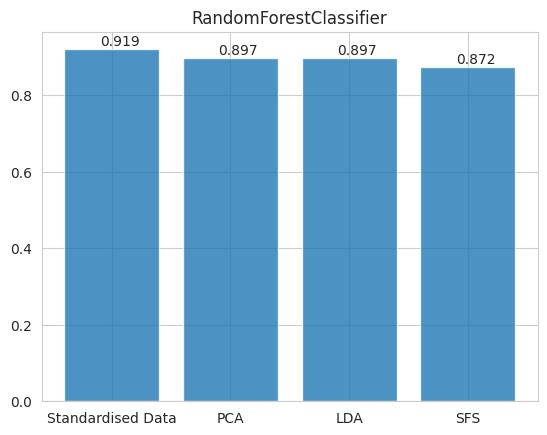

In [ ]:

model=RandomForestClassifier(max_depth=best_max_depth_1+1)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=RandomForestClassifier(max_depth=best_max_depth_2+1)
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=RandomForestClassifier(max_depth=best_max_depth_3+1)
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=RandomForestClassifier(max_depth=best_max_depth_4+1)
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("RandomForestClassifier")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**Using Boosting Algortihms**

0.87
0.78
0.86
0.87


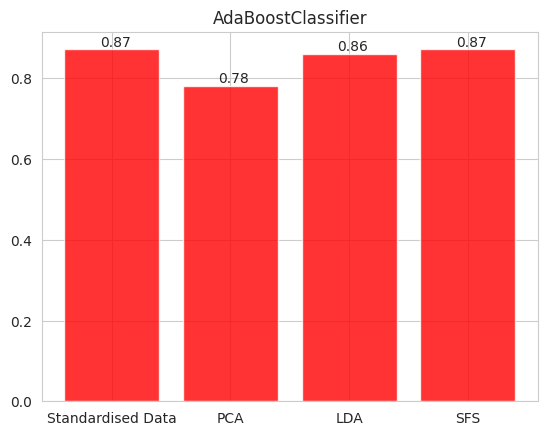

In [ ]:
model1=AdaBoostClassifier()
model1.fit(x_train,y_train)
acc1=model1.score(x_test1,y_test1)

model2=AdaBoostClassifier()
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test1_pca,y_test1_pca)

model3=AdaBoostClassifier()
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test1_lda,y_test1_lda)

model4=AdaBoostClassifier()
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test1_sfs,y_test1_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("AdaBoostClassifier")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = round(bar.get_height(),2)
    print(yval)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 scores**

Accuracy Score on Standardised Data 0.9122807017543859
Accuracy Score on PCA Data 0.782051282051282
Accuracy Score on LDA Data 0.8589743589743589
Accuracy Score on SFS Data 0.8717948717948718


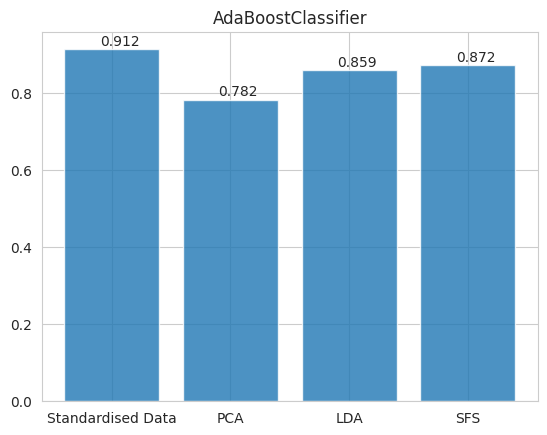

In [ ]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=AdaBoostClassifier()
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=AdaBoostClassifier()
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=AdaBoostClassifier()
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("AdaBoostClassifier")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**Using XGBoost Classifier**

0.8717948717948718
0.8589743589743589
0.8589743589743589
0.8717948717948718


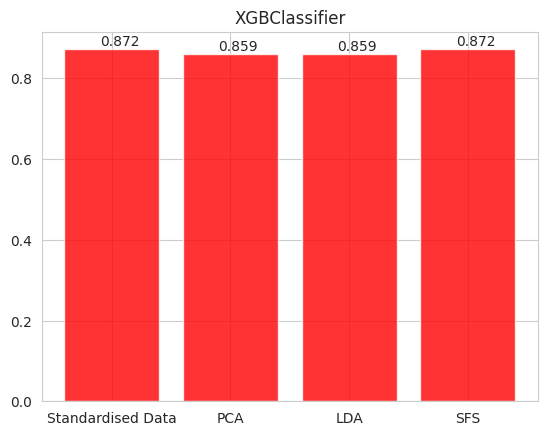

In [ ]:
model=XGBClassifier(random_state=0)

model1=XGBClassifier()
model1.fit(x_train,y_train)
acc1=model1.score(x_test1,y_test1)

model2=XGBClassifier()
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test1_pca,y_test1_pca)

model3=XGBClassifier()
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test1_lda,y_test1_lda)

model4=XGBClassifier()
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test1_sfs,y_test1_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("XGBClassifier")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    print(bar.get_height())
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 Scores**

Accuracy Score on Standardised Data 0.9137931034482759
Accuracy Score on PCA Data 0.8589743589743589
Accuracy Score on LDA Data 0.8589743589743589
Accuracy Score on SFS Data 0.8717948717948718


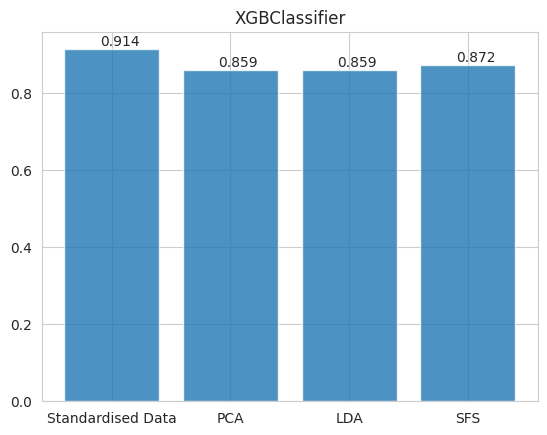

In [ ]:
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=XGBClassifier()
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=XGBClassifier()
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=XGBClassifier()
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("XGBClassifier")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**Neural Network**

**Finding best number of nodes in the hidden layer**

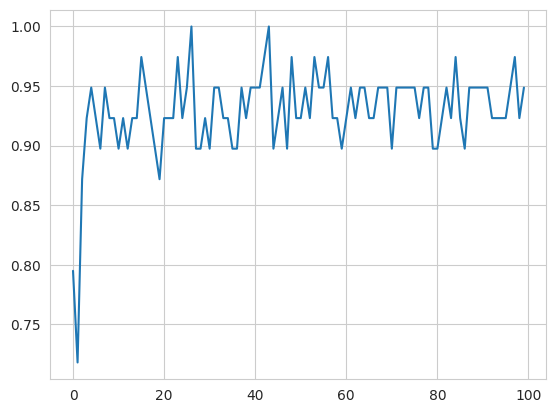

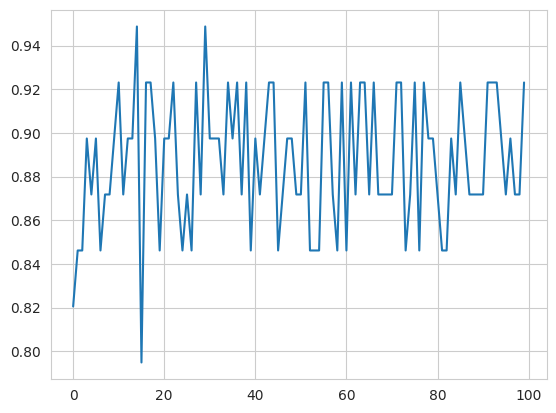

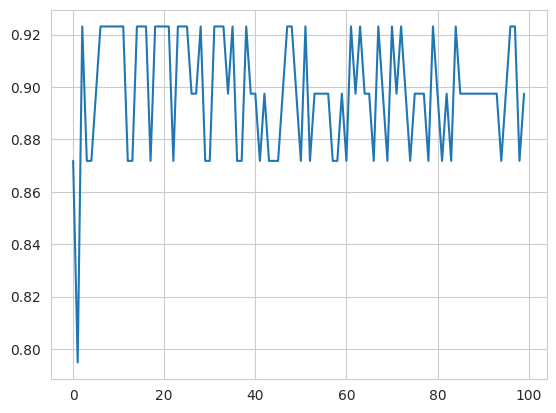

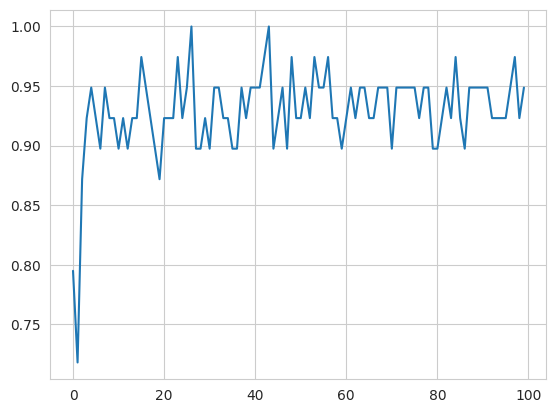

In [ ]:
#For the Standardised data
acc1=[]
for i in range(100):
  model = MLPClassifier(random_state=1,hidden_layer_sizes=[i+1], max_iter=3000)
  model.fit(x_train,y_train)
  acc1.append(model.score(x_val,y_val))

plt.plot(acc1)
plt.show()

best_hidden1=np.argmax(acc1)+1

#For the PCA data
acc2=[]
for i in range(100):
  model = MLPClassifier(random_state=1,hidden_layer_sizes=[i+1], max_iter=3000)
  model.fit(x_train_pca,y_train_pca)
  acc2.append(model.score(x_val_pca,y_val_pca))

plt.plot(acc2)
plt.show()

best_hidden2=np.argmax(acc2)+1

#For the LDA data
acc3=[]
for i in range(100):
  model = MLPClassifier(random_state=1,hidden_layer_sizes=[i+1], max_iter=3000)
  model.fit(x_train_lda,y_train_lda)
  acc3.append(model.score(x_val_lda,y_val_lda))

plt.plot(acc3)
plt.show()

best_hidden3=np.argmax(acc3)+1


#For the LDA data
acc4=[]
for i in range(100):
  model = MLPClassifier(random_state=1,hidden_layer_sizes=[i+1], max_iter=3000)
  model.fit(x_train_sfs,y_train_sfs)
  acc4.append(model.score(x_val_sfs,y_val_sfs))

plt.plot(acc4)
plt.show()

best_hidden4=np.argmax(acc4)+1


0.8717948717948718
0.8974358974358975
0.8717948717948718
0.8717948717948718


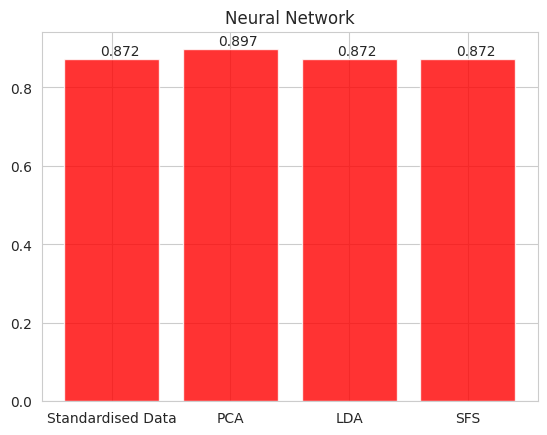

In [ ]:
model1=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden1], max_iter=3000)
model1.fit(x_train,y_train)
acc1=model1.score(x_test,y_test)

model2=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden2], max_iter=3000)
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test_pca,y_test_pca)

model3=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden3], max_iter=3000)
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test_lda,y_test_lda)

model4=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden4], max_iter=3000)
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test_sfs,y_test_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("Neural Network")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    print(bar.get_height())
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 Scores**

Accuracy Score on Standardised Data 0.954954954954955
Accuracy Score on PCA Data 0.8974358974358975
Accuracy Score on LDA Data 0.8717948717948718
Accuracy Score on SFS Data 0.8717948717948718


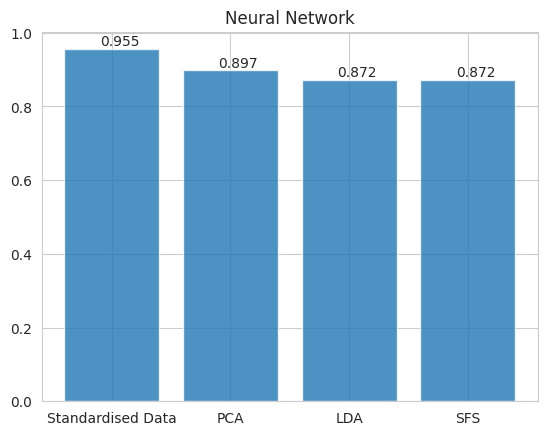

In [ ]:
model=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden1], max_iter=3000)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden2], max_iter=3000)
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden3], max_iter=3000)
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=MLPClassifier(random_state=1,hidden_layer_sizes=[best_hidden4], max_iter=3000)
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("Neural Network")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**Support Vector Machine Classifier**

0.8974358974358975
0.8974358974358975
0.8974358974358975
0.8974358974358975


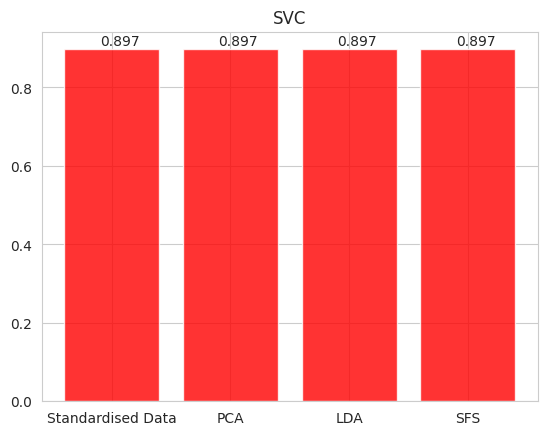

In [ ]:
model1=SVC()
model1.fit(x_train,y_train)
acc1=model1.score(x_test1,y_test1)

model2=SVC()
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test1_pca,y_test1_pca)

model3=SVC()
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test1_lda,y_test1_lda)

model4=SVC()
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test1_sfs,y_test1_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("SVC")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    print(bar.get_height())
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 Scores**

Accuracy Score on Standardised Data 0.9344262295081968
Accuracy Score on PCA Data 0.8974358974358975
Accuracy Score on LDA Data 0.8974358974358975
Accuracy Score on SFS Data 0.8974358974358975


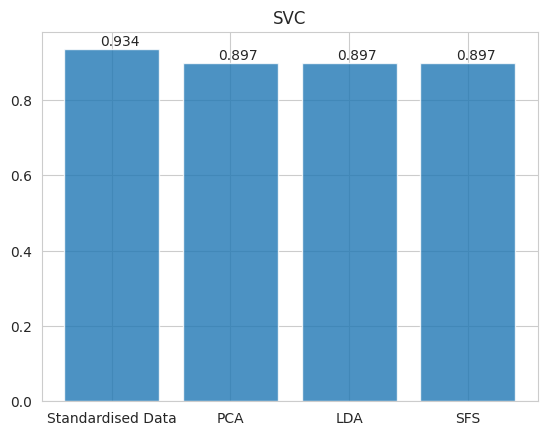

In [ ]:
model=SVC()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=SVC()
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=SVC()
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=SVC()
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("SVC")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

0.9487179487179487
0.9487179487179487
0.8974358974358975
0.9487179487179487


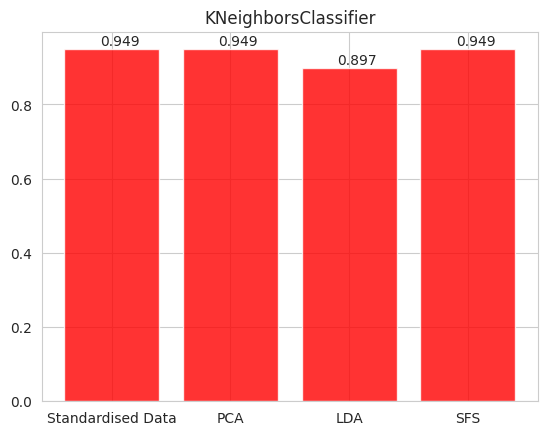

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
temp=6
model1=KNeighborsClassifier(n_neighbors=temp)
model1.fit(x_train,y_train)
acc1=model1.score(x_test1,y_test1)

model2=KNeighborsClassifier(n_neighbors=temp)
model2.fit(x_train_pca,y_train_pca)
acc2=model2.score(x_test1_pca,y_test1_pca)

model3=KNeighborsClassifier(n_neighbors=temp)
model3.fit(x_train_lda,y_train_lda)
acc3=model3.score(x_test1_lda,y_test1_lda)

model4=KNeighborsClassifier(n_neighbors=temp)
model4.fit(x_train_sfs,y_train_sfs)
acc4=model4.score(x_test1_sfs,y_test1_sfs)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],color="red",alpha=0.8)
plt.title("KNeighborsClassifier")

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    print(bar.get_height())
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

**F1 Scores**

Accuracy Score on Standardised Data 0.9655172413793103
Accuracy Score on PCA Data 0.9487179487179487
Accuracy Score on LDA Data 0.8974358974358975
Accuracy Score on SFS Data 0.9487179487179487


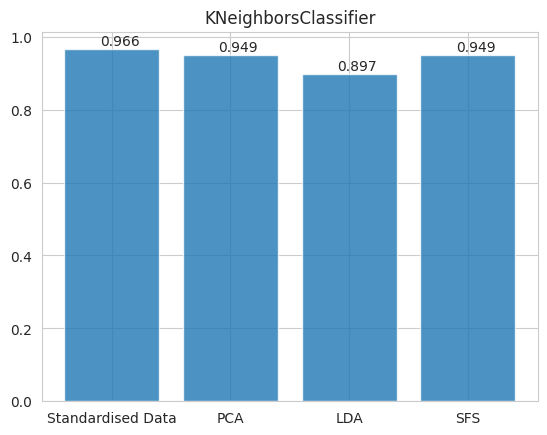

Text(0.5, 23.52222222222222, 'Actual')

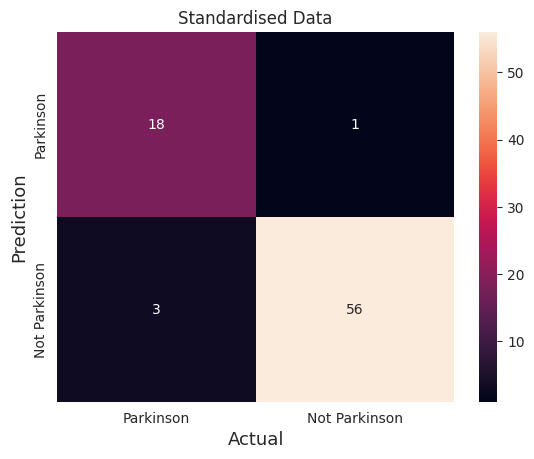

In [ ]:
model=KNeighborsClassifier(n_neighbors=temp)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test1)
acc1=f1_score(y_test1, y_pred1)

print("Accuracy Score on Standardised Data",acc1)

model=KNeighborsClassifier(n_neighbors=temp)
model.fit(x_train_pca,y_train_pca)
y_pred1_pca=model.predict(x_test1_pca)
acc1=f1_score(y_test1_pca, y_pred1_pca)

print("Accuracy Score on PCA Data",acc2)

model=KNeighborsClassifier(n_neighbors=temp)
model.fit(x_train_lda,y_train_lda)
y_pred1_lda=model.predict(x_test1_lda)
acc1=f1_score(y_test1_lda, y_pred1_lda)

print("Accuracy Score on LDA Data",acc3)

model=KNeighborsClassifier(n_neighbors=temp)
model.fit(x_train_sfs,y_train_sfs)
y_pred1_sfs=model.predict(x_test1_sfs)
acc1=f1_score(y_test1_sfs, y_pred1_sfs)
print("Accuracy Score on SFS Data",acc4)

bars=plt.bar(["Standardised Data","PCA","LDA","SFS"],[acc1,acc2,acc3,acc4],alpha=0.8)
plt.title("KNeighborsClassifier")
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.3, yval + .01, yval)
plt.show()

dat=confusion_matrix(y_pred1,y_test1)
sns.heatmap(dat,annot=True,xticklabels=['Parkinson','Not Parkinson'],
            yticklabels=['Parkinson','Not Parkinson'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)